In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. In how many cities Summer Olympics is held so far?

In [ ]:
df = pd.read_csv("summer.csv")

In [ ]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [ ]:
df.City.unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [ ]:
len(df.City.unique())+1

23

2. Which sport is having most number of Gold Medals so far? (Top 5)

In [ ]:
df.loc[df['Medal'] =='Gold', 'Gold?'] = '1'
df.loc[df['Medal']!='Gold' , 'Gold?'] = 'aa'

In [ ]:
df['Gold?']

0         1
1        aa
2        aa
3         1
4        aa
         ..
31160    aa
31161     1
31162    aa
31163    aa
31164    aa
Name: Gold?, Length: 31165, dtype: object

In [ ]:
df['Gold?'] = pd.to_numeric(df['Gold?'], errors='coerce')

In [ ]:
df['Gold?']

0        1.0
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
31160    NaN
31161    1.0
31162    NaN
31163    NaN
31164    NaN
Name: Gold?, Length: 31165, dtype: float64

In [ ]:
df.dropna(subset = ["Gold?"], inplace=True)

In [ ]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Gold?
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1.0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,1.0
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,1.0
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold,1.0
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,1.0
...,...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold,1.0
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold,1.0
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold,1.0
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold,1.0


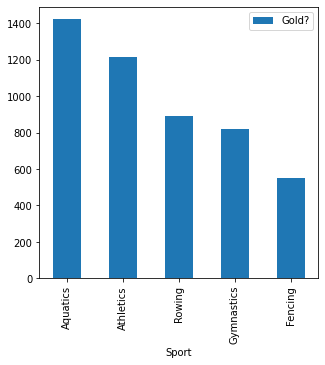

In [ ]:
data = []

for Sport in df['Sport'].unique():
    data.append([Sport , len(df[df['Sport']  == Sport])])

pd.DataFrame(data,columns = ['Sport','Gold?']).sort_values(by='Gold?', ascending=False).head().plot(x = 'Sport', y = 'Gold?', kind = 'bar', figsize = (5,5))

3. Which sport is having most number of medals so far? (Top 5)

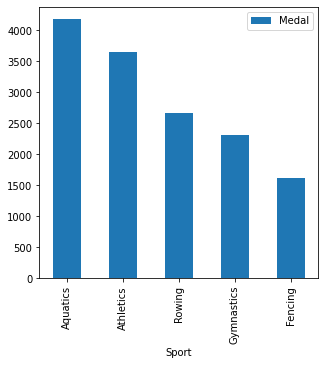

In [ ]:
data = []

for Sport in df['Sport'].unique():
    data.append([Sport , len(df[df['Sport']  == Sport])])

pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (5,5))

4. Which player has won most number of medals? (Top 5)

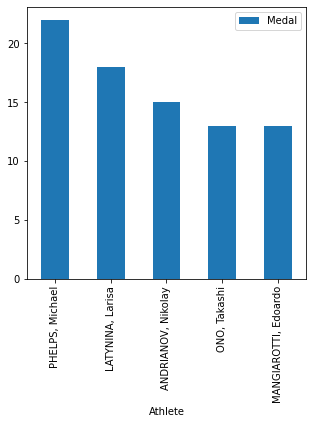

In [ ]:
data = []

for Athlete in df['Athlete'].unique():
    data.append([Athlete , len(df[df['Athlete']  == Athlete])])

pd.DataFrame(data,columns = ['Athlete','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Athlete', y = 'Medal', kind = 'bar', figsize = (5,5))

5. Which player has won most number Gold Medals of medals? (Top 5)

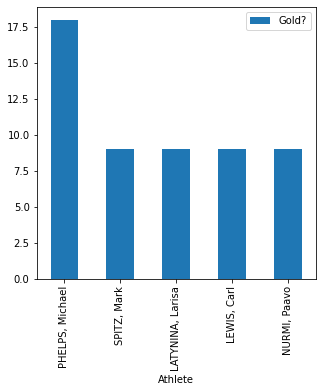

In [ ]:
data = []

for Athlete in df['Athlete'].unique():
    data.append([Athlete , len(df[df['Athlete']  == Athlete])])

pd.DataFrame(data,columns = ['Athlete','Gold?']).sort_values(by='Gold?', ascending=False).head().plot(x = 'Athlete', y = 'Gold?', kind = 'bar', figsize = (5,5))

6. In which year India won first Gold Medal in Summer Olympics?

In [ ]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Gold?
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1.0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,1.0
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,1.0
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold,1.0
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,1.0
...,...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold,1.0
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold,1.0
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold,1.0
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold,1.0


In [ ]:
df_groupby_Country = df.groupby('Country')
df_India = df_groupby_Country.get_group('IND')
df1=df_India.head()

In [ ]:
df1

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Gold?
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold,1.0
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold,1.0
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold,1.0
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold,1.0
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold,1.0


In [ ]:
print(df1['Year'].iloc[0])

1928


7. Which event is most popular in terms on number of players? (Top 5)

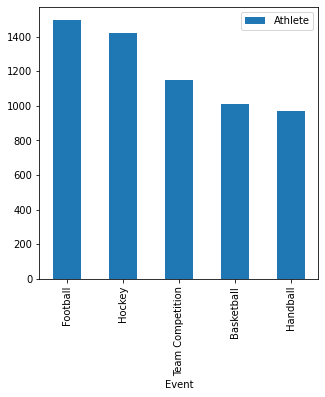

In [ ]:
data = []

for Event in df['Event'].unique():
    data.append([Event , len(df[df['Event']  == Event])])

pd.DataFrame(data,columns = ['Event','Athlete']).sort_values(by='Athlete', ascending=False).head().plot(x = 'Event', y = 'Athlete', kind = 'bar', figsize = (5,5))

8. Which sport is having most female Gold Medalists? (Top 5)

In [ ]:
 df_groupby_Gender=df.groupby('Gender')


In [ ]:
df_groupby_Gender.groups

{'Men': [0, 3, 6, 9, 13, 15, 18, 21, 24, 27, 29, 33, 36, 40, 43, 46, 49, 51, 54, 56, 59, 62, 65, 67, 70, 72, 74, 76, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 115, 118, 121, 124, 127, 130, 134, 135, 140, 143, 146, 149, 152, 155, 158, 161, 168, 169, 170, 171, 172, 179, 182, 198, 199, 200, 201, 202, 203, 204, 213, 216, 219, 222, 224, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 257, 258, 259, ...], 'Women': [417, 641, 649, 710, 713, 730, 731, 732, 733, 1185, 1843, 1849, 1870, 1876, 1941, 1956, 1974, 1975, 1976, 1977, 2771, 2777, 2783, 2789, 2826, 2832, 2844, 2859, 2865, 2866, 2867, 2868, 3792, 4018, 4024, 4034, 4035, 4042, 4048, 4124, 4130, 4139, 4145, 4154, 4160, 4167, 4168, 4169, 4170, 4171, 4172, 4474, 4934, 4935, 4942, 4948, 5008, 5014, 5020, 5026, 5035, 5041, 5047, 5048, 5049, 5050, 5098, 5134, 5135, 5136, 5137, 5161, 5170, 5179, 5306, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5659, 57

In [ ]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Gold?
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1.0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,1.0
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,1.0
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold,1.0
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,1.0
...,...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold,1.0
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold,1.0
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold,1.0
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold,1.0


In [ ]:
df.loc[df['Gender'] =='Women', 'Women?'] = '1'
df.loc[df['Gender']!='Women' , 'Women?'] = 'aa'

In [ ]:
df['Women?']

0        aa
3        aa
6        aa
9        aa
13       aa
         ..
31145    aa
31149    aa
31153    aa
31157    aa
31161    aa
Name: Women?, Length: 10486, dtype: object

In [ ]:
df['Women?'] = pd.to_numeric(df['Women?'], errors='coerce')

In [ ]:
df['Women?']

0       NaN
3       NaN
6       NaN
9       NaN
13      NaN
         ..
31145   NaN
31149   NaN
31153   NaN
31157   NaN
31161   NaN
Name: Women?, Length: 10486, dtype: float64

In [ ]:
df.dropna(subset = ["Women?"], inplace=True)

In [ ]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Gold?,Women?
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold,1.0,1.0
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold,1.0,1.0
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold,1.0,1.0
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold,1.0,1.0
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
31081,2012,London,Weightlifting,Weightlifting,"VALENTIN PEREZ, Lidia",ESP,Women,75KG,Gold,1.0,1.0
31097,2012,London,Wrestling,Wrestling Freestyle,"OBARA, Hitomi",JPN,Women,Wf 48 KG,Gold,1.0,1.0
31105,2012,London,Wrestling,Wrestling Freestyle,"YOSHIDA, Saori",JPN,Women,Wf 55 KG,Gold,1.0,1.0
31113,2012,London,Wrestling,Wrestling Freestyle,"ICHO, Kaori",JPN,Women,Wf 63 KG,Gold,1.0,1.0


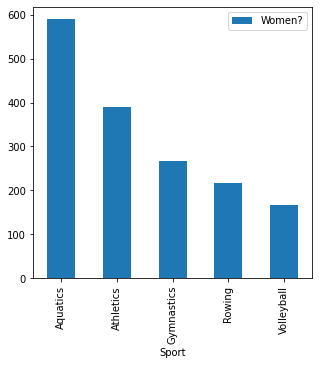

In [ ]:
data = []

for Sport in df['Sport'].unique():
    data.append([Sport , len(df[df['Sport']  == Sport])])

pd.DataFrame(data,columns = ['Sport','Women?']).sort_values(by='Women?', ascending=False).head().plot(x = 'Sport', y = 'Women?', kind = 'bar', figsize = (5,5))